<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body style="font-family: Arial, sans-serif; background-color: #f8f8f8; margin: 0; padding: 0;">
  <div class="container" style="text-align: center; margin-top: 50px; position: relative; overflow: hidden;">
    <h1 class="title" style="font-size: 32px; position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); z-index: 2; background-color: #196F3D; color: white; padding: 20px; border-radius: 10px;">A Sip of Financial Analysis☕ - Starbucks Stocks</h1>
    <div class="background-block" style="width: 800px; height: 300px; background-color: white; border: 2px solid #8B4513; position: relative; overflow: hidden; margin: 20px auto; border-radius: 20px;">
      <div class="fill-block" style="position: absolute; bottom: 0; left: 0; background-color: #8B4513; width: 100%; height: 0; animation: fillBackground 5s forwards;"></div>
    </div>
  </div>

  <style>
    @keyframes fillBackground {
      0% { height: 0; }
      100% { height: 100%; }
    }
  </style>
</body>
</html>


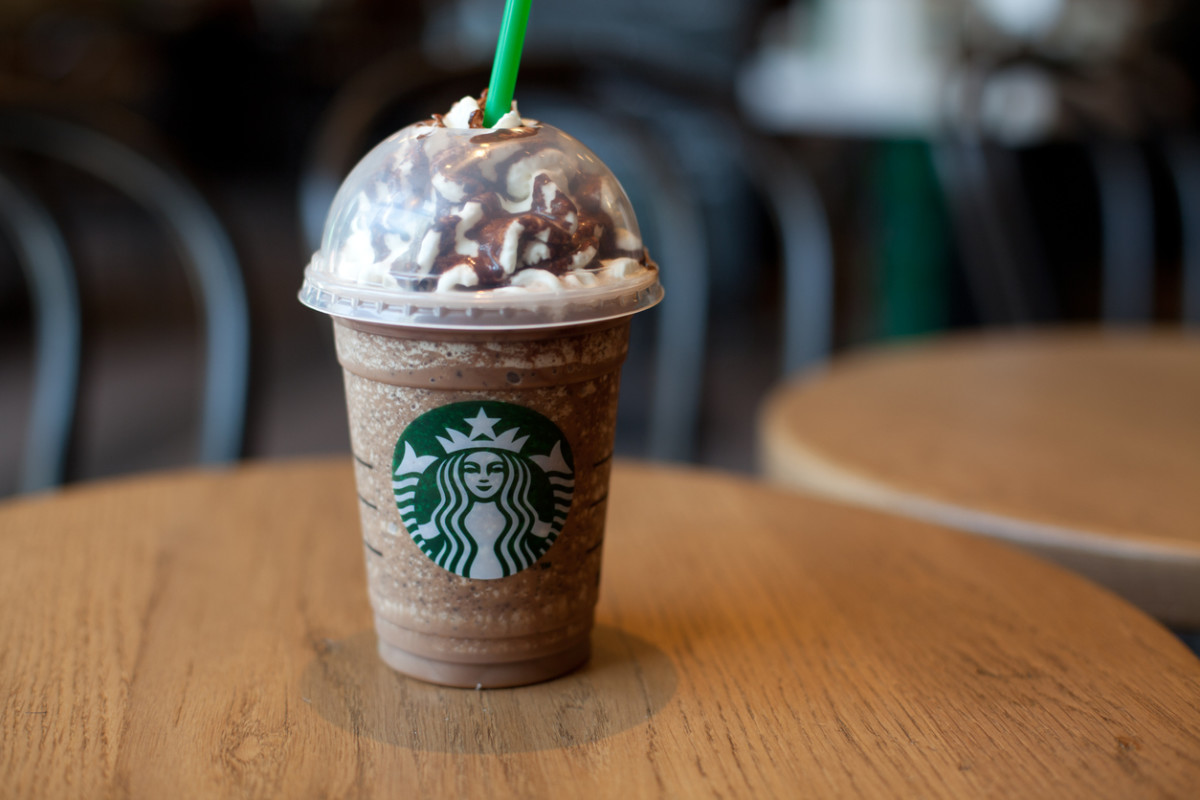

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate; text-align: center;">Introduction </p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">In this notebook we will examine the stocks of Starbucks, an American multinational chain of coffeehouses and roastery reserves. We will analyze their current financial situation and make decisions and inferences. Huge thanks go to Muhammad Ibrahim Qasmi for his awesome dataset. So, without further ado let's get started!</p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 10px; text-align: center;">👍 Upvote if you found this helpful!</p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 10px; text-align: center;">💬 Leave feedback to help me improve!</p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 10px; text-align: center;">🍴 Fork this notebook to make it your own!</p>
    <p style="font-size: 14px; margin-top: 20px;color: white; text-align: center;">Your feedback is valuable!</p>
</div>

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate; text-align: center;">Setup </p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">Let's setup the notebook by making the necessary imports and load the data.</p>
</div>

In [1]:
import pandas as pd                    
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from colorama import Fore, Style
from IPython.display import display, HTML
print('Setup Complete')

Setup Complete


In [2]:
data = pd.read_csv('/kaggle/input/starbucks-corp-stock-2022-present/sbux_stock_data.csv')

In [3]:
def print_boxed_blue_heading(heading):
    gradient = [Fore.RED, Fore.YELLOW, Fore.GREEN, Fore.CYAN, Fore.BLUE, Fore.MAGENTA]
    print("\n" + "=" * (len(heading) + 4))
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
        else:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")
    print("=" * (len(heading) + 4))

def print_error(message):
    raise ValueError(message)

def overview(df):
    try:

        # Display head of the dataset nicely
        print_boxed_blue_heading("The Head Of Dataset is:")
        display(HTML(df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        # Display tail of the dataset nicely
        print_boxed_blue_heading("The Tail Of Dataset is:")
        display(HTML(df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        print_boxed_blue_heading("Shape Data:")
        print(f'The Shape of the Data is {df.shape} |')
        print(f'- 1.The No of Rows is {df.shape[0]} |')
        print(f'- 2.The No of Cols is {df.shape[1]}|')
        
        print('\n')
        
        print_boxed_blue_heading("Info Of Data:")
        df.info()

        # Describe both numerical and categorical data
        print_boxed_blue_heading("Numerical Summary of Data:")
        print(f"\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Summary of Data is:{Style.RESET_ALL}")
        display(df.describe().style.set_caption("Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'skyblue')]}]))

        Cat_cols = [col for col in df.columns if df[col].dtype == 'O']
        print_boxed_blue_heading("Categorical Columns of Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Categorical Columns of Data are :{Style.RESET_ALL} {Cat_cols}')

        N_cols = [col for col in df.columns if df[col].dtype == 'float']
        print_boxed_blue_heading("Numerical Columns of Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Columns of Data are :{Style.RESET_ALL} {N_cols}\n')

        print_boxed_blue_heading("Null Values in Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Null Values of Data are:{Style.RESET_ALL}\n{df.isnull().sum()}')

        print_boxed_blue_heading("Duplicates Check in Data:")
        if df.duplicated().any():
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}Duplicates exist in the dataset.{Style.RESET_ALL}')
        else:
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}No duplicates found in the dataset.{Style.RESET_ALL}')

    except Exception as e:
        print_error(e)

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Viewing Data </p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">Let's view the data and examine it for its properties.</p>
</div>

In [4]:
overview(data)


| The | Head | Of | Dataset | is: |


Date,Open,High,Low,Close,Adj Close,Volume
2022-01-03,116.470001,117.800003,114.779999,116.680000,110.961662,5475700
2022-01-04,116.900002,117.050003,114.169998,114.239998,108.641243,8367600
2022-01-05,114.400002,114.959999,110.400002,110.440002,105.027473,8662300
2022-01-06,110.000000,111.879997,109.989998,111.139999,105.693169,6099900
2022-01-07,108.220001,109.709999,107.480003,107.570000,102.298134,11266400





| The | Tail | Of | Dataset | is: |


Date,Open,High,Low,Close,Adj Close,Volume
2024-04-29,88.239998,88.610001,87.860001,88.330002,88.330002,8522800
2024-04-30,87.610001,88.989998,87.180000,88.489998,88.489998,14538400
2024-05-01,75.820000,76.989998,72.669998,74.440002,74.440002,66610700
2024-05-02,74.900002,75.150002,73.349998,74.930000,74.930000,23883400
2024-05-03,75.269997,75.510002,72.985001,73.110001,73.110001,22153770





| Shape | Data: |
The Shape of the Data is (587, 7) |
- 1.The No of Rows is 587 |
- 2.The No of Cols is 7|



| Info | Of | Data: |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       587 non-null    object 
 1   Open       587 non-null    float64
 2   High       587 non-null    float64
 3   Low        587 non-null    float64
 4   Close      587 non-null    float64
 5   Adj Close  587 non-null    float64
 6   Volume     587 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 32.2+ KB

| Numerical | Summary | of | Data: |

The Numerical Summary of Data is:


,Open,High,Low,Close,Adj Close,Volume
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,93.781993,94.690426,92.814370,93.729966,91.607940,7932581.379898
std,9.384995,9.333749,9.457450,9.427199,9.664641,4461679.101237
min,69.150002,70.029999,68.389999,69.900002,66.964264,2320000.000000
25%,87.375000,88.595001,86.345001,87.430000,85.294998,5509700.000000
50%,94.750000,95.570000,93.790001,94.620003,93.109802,6870100.000000
75%,100.715000,101.610001,99.759998,100.670002,98.883434,8849800.000000
max,116.900002,117.800003,114.779999,116.680000,112.093674,66610700.000000



| Categorical | Columns | of | Data: |

The Categorical Columns of Data are : ['Date']

| Numerical | Columns | of | Data: |

The Numerical Columns of Data are : ['Open', 'High', 'Low', 'Close', 'Adj Close']


| Null | Values | in | Data: |

The Null Values of Data are:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

| Duplicates | Check | in | Data: |

No duplicates found in the dataset.


<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Exploratory Financial Analysis </p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">Let's make an EFA on the data and find out how good will it be to buy starbucks stocks.</p>
</div>

In [5]:
hovertext=[]
for i in range(len(data['Open'])):
    hovertext.append('Open: '+str(data['Open'][i])+'<br>Close: '+str(data['Close'][i]))
    
fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close'],
                    text=hovertext,
                    hoverinfo='text',
                    increasing_line_color= 'sandybrown', 
                    decreasing_line_color= 'white'))

fig.update_layout(title='OHLC Chart of Starbucks Stocks',
                template = 'plotly_dark')
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">The OHLC chart shows that lately, the stocks started slowly falling in price. This might actually be a good sign, since the stocks are cheap and can be bought for a low price. Let's examine the stocks further to decide whether it would be a good choice to buy the stocks.</p>
</div>

In [6]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

df['High_Low_Diff'] = data['High'] - data['Low']

# Create a line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['High_Low_Diff'], mode='lines', name='High-Low Difference', line= dict(color = 'tan')))

fig.update_layout(title='Stock Volatility (High-Low Difference)',
                xaxis_title='Date',
                yaxis_title='High-Low Difference',
                template='plotly_dark')

fig.show()

In [7]:
volat_min = df['High_Low_Diff'].min()
volat_max = df['High_Low_Diff'].max()
volat_av = df['High_Low_Diff'].mean()


print("The largest stock volatility reached was: ", volat_max)
print("The smallest stock volatility reached was: ", volat_min)
print("The average volatility is: ", volat_av)

The largest stock volatility reached was:  6.269996643066406
The smallest stock volatility reached was:  0.55999755859375
The average volatility is:  1.8760563787041158


<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">The volatility of the stocks looks good. It is somewhat stable, but at the same time has rises that can bring good profit.</p>
</div>

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'], y = data['Volume'], mode = "lines+markers", name = "Volume", line = dict(color = 'sandybrown')))
fig.update_layout(title='Trading Volume of Starbucks Stocks', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">The trading volume of the stocks was prettry consistent, until May 1rst this year, when the volume suddenly jumped to a value of 66.61M. The value quickly plummeted and on May 3rd it was 22.15M. The trading volume might return back to its normal consistency as that it had before. The sudden rise may have been caused by a sudden sellout of stocks by shareholders, due to a falling price of the stocks.</p>
</div>

In [9]:
vol_min = data['Volume'].min()
vol_max = data['Volume'].max()
vol_av = data['Volume'].mean()


print("The largest trading volume reached was: ", vol_max)
print("The smallest trading volume reached was: ", vol_min)
print("The average trading volume is: ", vol_av)

The largest trading volume reached was:  66610700
The smallest trading volume reached was:  2320000
The average trading volume is:  7932581.379897785


In [10]:
# Make columns with tomorrow's closing price, the closing difference, the daily return, and the price direction
data['Tomorrow Close'] = data['Close'].shift(-1)
data['Close Diff'] = data['Tomorrow Close'] - data['Close']
data['Daily Return'] = data['Close Diff'] / data['Close']
data['Price Dir'] = [1 if data['Close Diff'].loc[ei] > 0 else 0 for ei in data.index ]
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow Close,Close Diff,Daily Return,Price Dir
0,2022-01-03,116.470001,117.800003,114.779999,116.680000,110.961662,5475700,114.239998,-2.440002,-0.020912,0
1,2022-01-04,116.900002,117.050003,114.169998,114.239998,108.641243,8367600,110.440002,-3.799995,-0.033263,0
2,2022-01-05,114.400002,114.959999,110.400002,110.440002,105.027473,8662300,111.139999,0.699997,0.006338,1
3,2022-01-06,110.000000,111.879997,109.989998,111.139999,105.693169,6099900,107.570000,-3.570000,-0.032122,0
4,2022-01-07,108.220001,109.709999,107.480003,107.570000,102.298134,11266400,106.029999,-1.540001,-0.014316,0


In [11]:
fig = px.histogram(data, x='Price Dir', nbins=20, title='Distribution of Price Direction', marginal='box', color_discrete_sequence=['tan'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">The bar graph shows that the stocks have a more falling direction than a rising direction. This hints that the stocks have good ground for short-term investments.</p>
</div>

In [12]:
# Calculate the moving average for 10, 50, and 100 days
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data['MA100'] = data['Close'].rolling(100).mean()
data = data.dropna()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Closing Prices', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['MA10'], mode='lines', name='Moving Average 10 days', line=dict(color='tan')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['MA50'], mode='lines', name='Moving Average 50 days', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['MA100'], mode='lines', name='Moving Average 100 days', line=dict(color='brown')))
fig.update_layout(title='Moving Average Values of Boeing Corporation Stocks', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">This chart supports the inference that Starbucks stocks are good for short-term investments. As you can see there are many places where MA10 fell under MA50. When this happen, it means that holding the stocks will result in a loss of profit. Let's move on.</p>
</div>

In [14]:
A_MA10 = data['MA10'].mean()
A_MA50 = data['MA50'].mean()
A_MA100 = data['MA100'].mean()

print('The Average of the Moving Average of 10 days is: ', A_MA10)
print('The Average of the Moving Average of 50 days is: ', A_MA50)
print('The Average of the Moving Average of 100 days is: ', A_MA100)

MA_diff = A_MA10 - A_MA50
print('The difference between MA10 and MA50 is: ', MA_diff)

The Average of the Moving Average of 10 days is:  94.83318478625414
The Average of the Moving Average of 50 days is:  94.38975685448618
The Average of the Moving Average of 100 days is:  94.14107945373661
The difference between MA10 and MA50 is:  0.4434279317679568


In [15]:
# Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
data['Shares'] = [1 if data.loc[ei, 'MA10'] > data.loc[ei, 'MA50'] else 0 for ei in data.index]
# Make a new column that calculates the amount of profit we can get
data['Profit'] = [data.loc[ei, 'Tomorrow Close'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares'] == 1 else 0 for ei in data.index]
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow Close,Close Diff,Daily Return,Price Dir,MA10,MA50,MA100,Shares,Profit
581,2024-04-26,87.400002,89.250000,87.370003,88.250000,88.250000,7185300,88.330002,0.080002,0.000907,1,87.245,90.4004,92.5606,0,0.0
582,2024-04-29,88.239998,88.610001,87.860001,88.330002,88.330002,8522800,88.489998,0.159996,0.001811,1,87.561,90.3026,92.4679,0,0.0
583,2024-04-30,87.610001,88.989998,87.180000,88.489998,88.489998,14538400,74.440002,-14.049995,-0.158775,0,87.868,90.2080,92.3974,0,0.0
584,2024-05-01,75.820000,76.989998,72.669998,74.440002,74.440002,66610700,74.930000,0.489998,0.006582,1,86.691,89.8276,92.1716,0,0.0
585,2024-05-02,74.900002,75.150002,73.349998,74.930000,74.930000,23883400,73.110001,-1.820000,-0.024289,0,85.469,89.4258,91.9565,0,0.0


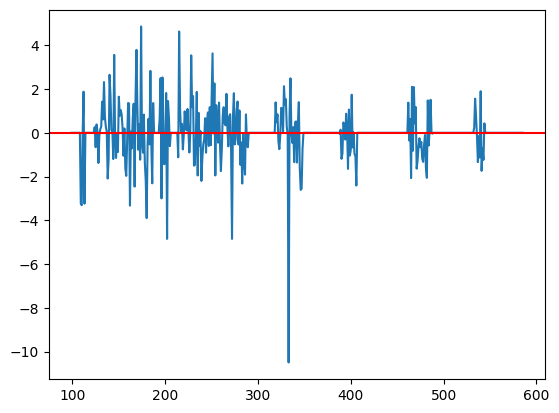

In [16]:
# Plot the profit
data['Profit'].plot()
plt.axhline(y=0, color='red');

In [17]:
data['Wealth'] = data['Profit'].cumsum()
plotly_trace = go.Scatter(x=data.index, y=data['Wealth'], mode='lines', name='Wealth')
layout = go.Layout(title='Total money you get is {}'.format(data.loc[data.index[-2], 'Wealth']), xaxis=dict(title='Index'), yaxis=dict(title='Wealth'))
plotly_figure = go.Figure(data=[plotly_trace], layout=layout)
plotly_figure.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #196F3D; }
        50% { color: #8B4513; }
        100% { color: #196F3D; }
    }
</style>

<div style="border: 3px solid #8B4513; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px #8B4513; background-color: white; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Financial Conclusions </p>
    <p style="color: #8B4513; font-size: 16px; margin-bottom: 20px; text-align: center;">As I said earlier, the stocks seem to have a good ground for short-term investments which bring good money very fast. Based on the graph, if you hold on to the stock for too long,you may have a loss. This reinforces my inference that starbucks stocks are good for short term investments. As you can see, at index 332 on the y-axis, the stock could have brought profit of 15 dollars not counting dividends paid by the company. Selling the stock at that point would have resulted at about 45-70% of profit. So, Starbucks stocks are good for short-term holding.</p>
</div>

<div style="background: linear-gradient(to right, #8B4513, #8B4513, #8B4513); border-radius: 20px; padding: 20px; font-family: Arial, sans-serif; font-size: 24px; color: white; display: inline-block; border: 2px solid transparent; animation: bounce 2s infinite;">
    <span style="font-weight: bold;"></span>
    <span style="color: #8B4513; margin: 0 10px;">🌟</span>
    <span style="font-style: italic;color:white ;font-weight: bold;">Thank you for viewing this notebook! Please Upvote👍 and fork🍴. God bless you🙏</span>
</div>

<style>
    @keyframes bounce {
        0%, 100% {
            transform: translateY(0);
        }
        50% {
            transform: translateY(-10px);
        }
    }
</style>